In [1]:
# with the previous n labels
# produce the next node
# if the prediction is not available, then use the next likely node, and so on

testRatio = 0.2

In [6]:
import pickle
from tqdm import tqdm

filename = "cat"

# open file ../data/{filename}_journeys.pkl
with open(f'../data/{filename}_journeys.pkl', 'rb') as f:
    journeys = pickle.load(f)

# ngram variables
n = 15
ngram = {}

# create ngram. ngram is a dictionary of dictionaries
# key is tuple of n labels
# value is a dictionary of next labels and their counts
for journey in tqdm(journeys):
    for i in range(len(journey) - n):
        # each label is the first element split by __
        key = tuple(map(lambda x: x.split('__')[0], journey[i:i+n]))
        if key not in ngram:
            ngram[key] = {}
        if journey[i+n] not in ngram[key]:
            ngram[key][journey[i+n]] = 0
        ngram[key][journey[i+n]] += 1

100%|██████████| 1000000/1000000 [07:12<00:00, 2314.35it/s]


In [7]:
# test the accuracy of the model
# for each journey, predict the next label
# if the prediction is not available, then use the next likely node, and so on

testSize = int(len(journeys) * testRatio)

# random sample journeys
import random
random.seed(0)
test_journeys = random.sample(journeys, testSize)

# accuracy
correct = testSize

# lengths
lengths = []
ans_lengths = []

for journey in tqdm(test_journeys):
    for i in range(len(journey) - n):
        # each label is the first element split by __
        key = tuple(map(lambda x: x.split('__')[0], journey[i:i+n]))
        if key in ngram:
            # get the next label with the highest count
            next_label = max(ngram[key], key=ngram[key].get)
            if next_label != journey[i+n]:
                correct -= 1
                lengths.append(i)
                ans_lengths.append(len(journey)-n)
                break

100%|██████████| 200000/200000 [00:38<00:00, 5201.40it/s]


Accuracy: 0.0


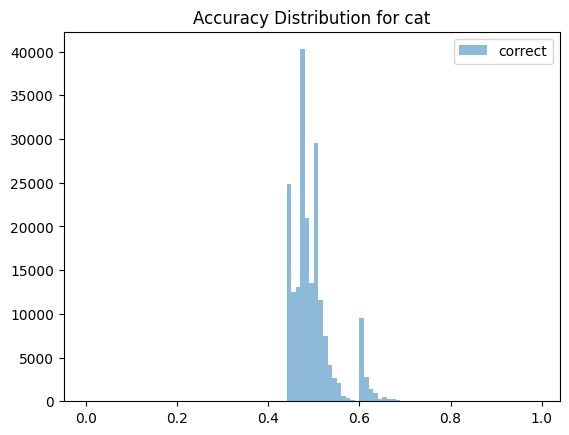

In [8]:
print(f"Accuracy: {correct / testSize}")

# plot the lengths / ans_lengths distribution

import matplotlib.pyplot as plt
import numpy as np

np_lengths = np.array(lengths)
np_ans_lengths = np.array(ans_lengths)

plt.hist(np_lengths / np_ans_lengths, bins=np.arange(0, 1, 0.01), alpha=0.5, label='correct')

plt.legend(loc='upper right')
plt.title(f'Accuracy Distribution for {filename}')
plt.show()

In [9]:
np.average(np_lengths / np_ans_lengths)

0.49536109831245645